In [50]:
import tensorflow as tf
print(tf.__version__)

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

2.4.0
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12707879224419279038
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 4922553139
locality {
  bus_id: 1
  links {
  }
}
incarnation: 16198730809252102227
physical_device_desc: "device: 0, name: GeForce GTX 1060 6GB, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


In [51]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2

In [52]:
img_size = 128
batch_size = 32
data_dir = 'blockCharactersData/Fnt_vol2'
model = None
train = None
val = None

# Data

In [53]:
train = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    labels='inferred',
    label_mode='categorical',
    validation_split=0.2,
    subset="training",
    seed=0,
    image_size=(img_size, img_size),
    batch_size=batch_size,
    color_mode='rgb'
)
val = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    labels='inferred',
    label_mode='categorical',
    validation_split=0.2,
    subset="validation",
    seed=0,
    image_size=(img_size, img_size),
    batch_size=batch_size,
    color_mode='rgb'
)

Found 35858 files belonging to 36 classes.
Using 28687 files for training.
Found 35858 files belonging to 36 classes.
Using 7171 files for validation.


# Sieć

In [67]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.experimental.preprocessing.Rescaling(1/255, input_shape=(img_size, img_size, 3)))

model.add(tf.keras.layers.Conv2D(16, kernel_size=(3, 3), activation='relu', padding="same"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2)))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Conv2D(32, kernel_size=(5, 5), activation='relu', padding="valid"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2)))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Conv2D(64, kernel_size=(5, 5), activation='relu', padding="valid"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2)))
model.add(tf.keras.layers.Dropout(0.2))


model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(36, activation='softmax'))
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [68]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_14 (Rescaling)     (None, 128, 128, 3)       0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 128, 128, 16)      448       
_________________________________________________________________
batch_normalization_82 (Batc (None, 128, 128, 16)      64        
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 64, 64, 16)        0         
_________________________________________________________________
dropout_82 (Dropout)         (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 60, 60, 32)        12832     
_________________________________________________________________
batch_normalization_83 (Batc (None, 60, 60, 32)      

# Uczenie oraz ocena

In [69]:
model.fit(train, epochs=15, validation_data=val)

Epoch 1/15
897/897 [==============================] - 56s 61ms/step - loss: 1.0361 - accuracy: 0.7420 - val_loss: 0.2458 - val_accuracy: 0.9311
Epoch 2/15
897/897 [==============================] - 54s 60ms/step - loss: 0.2347 - accuracy: 0.9313 - val_loss: 0.1380 - val_accuracy: 0.9536
Epoch 3/15
897/897 [==============================] - 54s 60ms/step - loss: 0.1609 - accuracy: 0.9505 - val_loss: 0.1076 - val_accuracy: 0.9632
Epoch 4/15
897/897 [==============================] - 54s 60ms/step - loss: 0.1125 - accuracy: 0.9625 - val_loss: 0.0891 - val_accuracy: 0.9667
Epoch 5/15
897/897 [==============================] - 54s 60ms/step - loss: 0.1040 - accuracy: 0.9652 - val_loss: 0.0804 - val_accuracy: 0.9707
Epoch 6/15
897/897 [==============================] - 54s 60ms/step - loss: 0.0893 - accuracy: 0.9685 - val_loss: 0.0606 - val_accuracy: 0.9794
Epoch 7/15
897/897 [==============================] - 54s 60ms/step - loss: 0.0815 - accuracy: 0.9730 - val_loss: 0.1068 - val_accuracy:

In [70]:
#wyniki na zbiorze uczącym
model.evaluate(train) #97.3

897/897 [==============================] - 30s 33ms/step - loss: 0.0228 - accuracy: 0.9910


[0.02284085378050804, 0.9910063743591309]

In [71]:
#wyniki na zbiorze walidacyjnym
model.evaluate(val)

225/225 [==============================] - 8s 33ms/step - loss: 0.0534 - accuracy: 0.9815


[0.05344865471124649, 0.9814530611038208]

# Wczytywanie i zapisywanie modeli

In [72]:
model.save('siec_v3.h5')

In [4]:
model = tf.keras.models.load_model('siec_v1.h5')

# Testowanie jednostkowe

In [17]:
#path = 'blockCharactersData/Fnt_vol2/A/1.png'
#path = 'in/17.jpg'
path = 'CharExample/44.jpg'

In [18]:
labels = []
labels.extend(list('0123456789'))
labels.extend(list('AaBbCcDdEeFfGgHhIiJjKkLlMmNnOoPpQqRrSsTtUuVvWwXxYyZz'))
print(labels)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'a', 'B', 'b', 'C', 'c', 'D', 'd', 'E', 'e', 'F', 'f', 'G', 'g', 'H', 'h', 'I', 'i', 'J', 'j', 'K', 'k', 'L', 'l', 'M', 'm', 'N', 'n', 'O', 'o', 'P', 'p', 'Q', 'q', 'R', 'r', 'S', 's', 'T', 't', 'U', 'u', 'V', 'v', 'W', 'w', 'X', 'x', 'Y', 'y', 'Z', 'z']


In [19]:
image = tf.keras.preprocessing.image.load_img(path, target_size=(img_size, img_size))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr_batch = np.array([input_arr])
predictions = model.predict(input_arr_batch)
print(np.argmax(predictions),labels[np.argmax(predictions)])

11 a


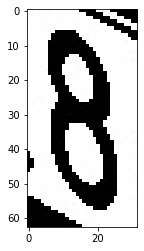

In [20]:
img = cv2.imread(path)
plt.imshow(img)
plt.show()